In [64]:
from sko.operators import ranking, selection, crossover, mutation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sko.GA import GA, GA_TSP



In [65]:
def selection_tournament(algorithm, tourn_size):
    FitV = algorithm.FitV
    sel_index = []
    for i in range(algorithm.size_pop):
        aspirants_index = np.random.choice(range(algorithm.size_pop),
                                           size=tourn_size)
        sel_index.append(max(aspirants_index, key=lambda i: FitV[i]))
    algorithm.Chrom = algorithm.Chrom[sel_index, :]  # next generation
    return algorithm.Chrom



In [66]:

demo_func = lambda x: x[1] * math.sin(2 * math.pi * x[0]) + x[0] * math.cos(
    2 * math.pi * x[1])

ga = GA(func=demo_func,
        n_dim=2,
        size_pop=100,
        max_iter=500,
        lb=[-2, -2],
        ub=[2, 2],
        precision=[1e-7, 1e-7])

# # %% step3: register your own operator
ga.register(operator_name='selection',
            operator=selection_tournament,
            tourn_size=3)

In [67]:

ga.register(operator_name='ranking', operator=ranking.ranking). \
    register(operator_name='crossover', operator=crossover.crossover_2point). \
    register(operator_name='mutation', operator=mutation.mutation)

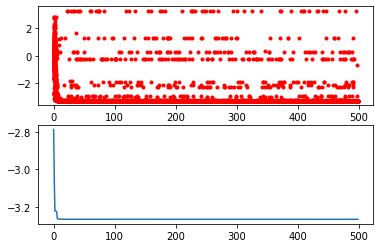

In [68]:
best_x, best_y = ga.run()
Y_history = pd.DataFrame(ga.all_history_Y)
fig, ax = plt.subplots(2, 1)
ax[0].plot(Y_history.index, Y_history.values, '.', color='red')
Y_history.min(axis=1).cummin().plot(kind='line')
plt.show()


In [69]:
print('best_x:', best_x, '\n', 'best_y:', best_y)


best_x: [1.76669097 1.51427811] 
 best_y: [-3.2655449]
